Notebook showing how to get boundaries from empirical models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fuvpy as fuv
from polplot import pp

Plot the Starkov (1994) boundary model for different values of the AL index

/Users/aohma/BCSS-DAG Dropbox/Anders Ohma/python/git/fuvpy/fuvpy/utils/ovalmodels.py:35: RuntimeWarning: divide by zero encountered in log10
  A = b[[0],:] + b[[1],:]*np.log10(al[:,None]) + b[[2],:]*np.log10(al[:,None])**2 + b[[3],:]*np.log10(al[:,None])**3
/Users/aohma/BCSS-DAG Dropbox/Anders Ohma/python/git/fuvpy/fuvpy/utils/ovalmodels.py:36: RuntimeWarning: invalid value encountered in cos
  clat = A[:,[0]] + A[:,[1]]*np.cos(np.deg2rad(15*(mlt[None,:]+ A[:,[4]]))) + A[:,[2]]*np.cos(np.deg2rad(15*(2*mlt[None,:]+A[:,[5]]))) + A[:,[3]]*np.cos(np.deg2rad(15*(3*mlt[None,:]+A[:,[6]])))
/Users/aohma/BCSS-DAG Dropbox/Anders Ohma/python/git/fuvpy/fuvpy/utils/ovalmodels.py:39: RuntimeWarning: divide by zero encountered in log10
  A = b[[0],:] + b[[1],:]*np.log10(al[:,None]) + b[[2],:]*np.log10(al[:,None])**2 + b[[3],:]*np.log10(al[:,None])**3
/Users/aohma/BCSS-DAG Dropbox/Anders Ohma/python/git/fuvpy/fuvpy/utils/ovalmodels.py:40: RuntimeWarning: invalid value encountered in cos
  clat = A[:,[

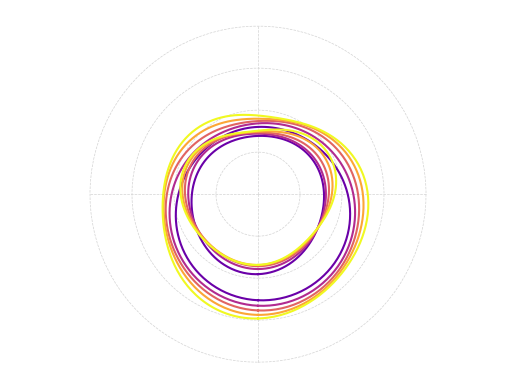

In [2]:
mlt=np.arange(0,24.1,0.1)
al=np.arange(0,501,100)
cmap = plt.cm.get_cmap('plasma',len(al))

pb = fuv.oval_starkov1994(mlt,al,boundary='pb')
eb = fuv.oval_starkov1994(mlt,al,boundary='eb')

fig,ax = plt.subplots()
pax=pp(ax)
for i in range(len(al)):
    pax.plot(pb[i,:],mlt,color=cmap(i))
    pax.plot(eb[i,:],mlt,color=cmap(i))

Plot the Hu et al (2017) boundary model for different values of the AE index

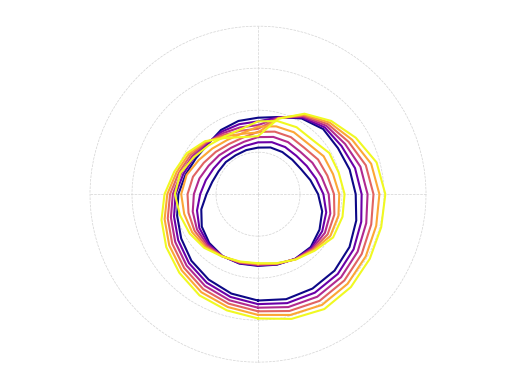

In [3]:
ae=np.arange(0,501,100)
Bx =  0 * np.ones_like(ae)
By =  0 * np.ones_like(ae)
Bz = -2 * np.ones_like(ae)
Vp =  4 * np.ones_like(ae)
Np =  2 * np.ones_like(ae)

cmap = plt.cm.get_cmap('plasma',len(ae))

pb = fuv.oval_hu2017(Bx,By,Bz,Vp,Np,ae,boundary='pb')
eb = fuv.oval_hu2017(Bx,By,Bz,Vp,Np,ae,boundary='eb')

mlt=np.arange(25)
pb = np.c_[pb,pb[:,0]]
eb = np.c_[eb,eb[:,0]]

fig,ax = plt.subplots()
pax=pp(ax)
for i in range(len(ae)):
    pax.plot(pb[i,:],mlt,color=cmap(i))
    pax.plot(eb[i,:],mlt,color=cmap(i))

Plot different convertions from Q index to Kp index

[-0.3   0.02  0.34  0.66  0.98  1.3   1.62  1.94  2.74  3.42  4.1   4.78
  5.46  6.14  6.82  7.5   8.18  8.86  9.54 10.22 10.9  11.58 12.26 12.94
 13.62 14.3  14.98 15.66]


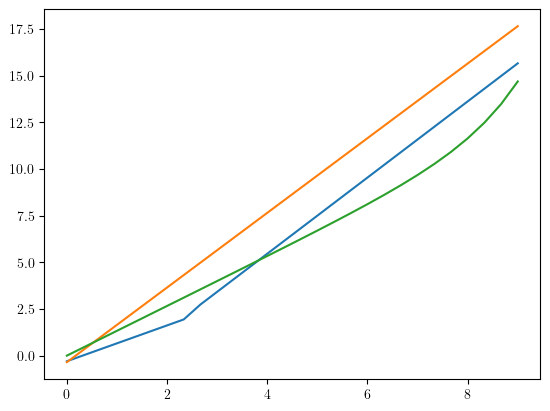

In [4]:
kp = np.arange(28)/3
Q1 = np.r_[.96*kp[:8]-0.3 , 2.04*kp[8:]-2.7]
Q2 = 2*kp - 0.35
Q3 = 1.33*kp + np.exp (kp - 8) 

fig,ax = plt.subplots()
ax.plot(kp,Q1)
ax.plot(kp,Q2)
ax.plot(kp,Q3)
print(Q1)

